# Purpose: Estimate, cumulate, and extrapolate and plot long wavelength radiative forcing from contrails, "other well mixed greenhouse gases", N2O, CH4, and CO2.

Clear all variables and reset the working directory and import necessary libraries

In [1]:
%reset -f
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy.optimize import curve_fit
import csv
import scipy
import mpmath
from scipy.special import erf
import sys
os.chdir('C:\\Users\\cd7\\Desktop\\Heat17Forcings')

Read the specified input file

In [2]:
df1 = pd.read_excel('heat18parameters06jan.xlsx')
df1.to_csv('heat18parameters06jan.csv',header=False,index=False)
df1 = pd.read_csv('heat18parameters06jan.csv')
# print (df1) 

In [3]:
b1 = df1.iloc[:,0:1]
b1 = b1['b1'].tolist()
b1 = list(map(float, b1))
print (b1)

b2 = df1.iloc[:,1:2]
b2 = b2['JulianYrEtc'].tolist()
b2 = list(map(float, b2))

b3 = df1.iloc[:,2:3]
b3 = b3['b3(Years)'].tolist()
b3 = list(map(float, b3))

b4 = df1.iloc[:,3:4]
b4 = b4['b4'].tolist()
b4 = list(map(float, b4))

[10.6644, 3.4656599999999997, 18.252, 0.242542, 0.199856, 0.770546, 0.964413, 64.1562, 176.655, 5.14088, 2.39098, 0.360664, 0.169096, 3.4656599999999997, 0.592935, 0.147705, 8.50988, 0.0, 0.0, 0.0, 0.292705, 0.0772446, 3.8108800000000005, 0.15466, 0.0461415, 0.13156700000000002, 0.18290399999999998, 0.13156700000000002]


Forcings

Contrails and Other Greenhouse Gases

In [4]:
def rad1(t):
    y = b1[12]/(1 + np.exp(-(t - b2[12])/b3[12]))
    return y

print(b1[11])

def rad2(t):
    y = b1[11]/(1 + np.exp(-(t - b2[11])/b3[11]))
    return y         

0.360664


N2O

In [15]:
def xn2o(t):
    y = (t - b2[10])/b3[10]
    return y

delta = b3[10]/b4[10]
        
def n2ofitindef(t):
    y = b1[10]*b3[10]*(np.log(1+np.exp(xn2o(t)))+delta*mpmath.polylog(2,-np.exp(xn2o(t)))-delta**2*mpmath.polylog(3,-np.exp(xn2o(t))))
    return y

t0 = 1750
tnow = 2017
# xn2o0 = xn2o(t0)
n2ofit0 = n2ofitindef(t0)
n2o0 = b3[19]
print (n2o0)
print (n2ofit0)
def n2ofit(t):
    y = n2o0 + n2ofitindef(t) - n2ofit0 + b1[22]*(1-1/(1 + np.exp(-(t - b2[22])/b3[22])))
    return y

n2ofit = np.vectorize(n2ofit)

def rad3(t):
    y = b1[19] + b2[19]*(n2ofit(t) - b3[19])
    return y
 
# t = np.arange(t0,tnow+1)
# plt.plot(t,rad3(t))
print (n2ofit(2000))
print (b1[22])
print (delta)

267.291
0.140978301597955
314.771773217386
3.8108800000000005
0.3149532856294722


CH4

In [6]:
ch40 = b3[18]
life = b4[8] #(* from heat17ch4emissions14dec.nb *)
eps = life/b3[8]
print (eps)
def x1(t):
    y = (t-b2[8])/b3[8]
    return y
def u(t):
    y = 1/(1 + np.exp(-x1(t)))
    return y

def ch4fit(t):
     y = ch40 + life*b1[8]*u(t)*(1-eps*(1-u(t))+eps**2*(1-u(t))*(1-2*u(t)))
#      y = ch40 + life*b1[8]*u(t)*(1-eps*(1-u(t))-eps**2*(1-u(t))*(1-2*u(t)))
     return y
def rad4(t):
    y = b1[18] + b2[18]*(ch4fit(t)-b3[18])
    return y

print (rad4(2000))
print (life)
print (ch4fit(2000))
print (b1[8])

0.2299045998898114
0.46256261522663905
9.51428
1725.1499963712517
176.655


CO2 from Land Use Changes

In [7]:
# co20 = b3[17]
gtonnecperppm = 2.13;

def dlogint(t):
    y = b1[1]/(1 + np.exp(-(t - b2[1])/b3[1]))
    return y
dlogint0 = dlogint(t0)
# print (dlogint0)

def co2logintland(t):
    y = b4[1]*(dlogint(t) - dlogint0)/gtonnecperppm
    return y

def gaussint(t,b1g,b2g,b3g):
    y = b1g*b3g*np.sqrt(np.pi/2)*(-erf((b2g - t)/(b3g*np.sqrt(2))) + erf((b2g - t0)/(b3g*np.sqrt(2))))
    return y


bg = [] # results from co2 landuse fit from (g1 b1 d1) to (g4 b4 d4).
for i in range(3,7):
    sub_list=[]
    for m in range(0,3):
        x = df1.iloc[i,m].tolist()
        sub_list.append(float(x))
    bg.append(sub_list)
# print (bg)
print (bg[0][0])

def gaussland(t):
    y = gaussint(t,bg[0][0],bg[0][1],bg[0][2])+gaussint(t,bg[1][0],bg[1][1],bg[1][2])+gaussint(t,bg[2][0],bg[2][1],bg[2][2])+gaussint(t,bg[3][0],bg[3][1],bg[3][2])
    return y

print (gaussland(2001))

def co2gauss(t):
    y = gaussland(t)/gtonnecperppm
    return y

def co2land(t):
    y = b4[3]*(co2logintland(t) + co2gauss(t))
    return y
# t = int(list(range(t0,tnow+1)))
# t = np.arange(t0,tnow+1)
# plt.plot(t,co2land(t))

def rad5(t):
    y = b1[17]+b2[17]*co2land(t)
    return y
# plt.figure()
# plt.plot(t,rad5(t))

print(co2land(2000))
print(b4[3])

0.242542
57.9961083797746
37.32991181860955
0.271308


Industrial CO2

In [8]:
x0 = (t0-b2[2])/b3[2]

def x(t):
    y = (t-b2[2])/b3[2]
    return y

def co2ind(t):
    y = b4[3]*b4[4]*b1[2]*b3[2]*(np.log(1+np.exp(x(t)))-np.log(1+np.exp(x0)))/gtonnecperppm
    return y

print (b4[4])

def rad6(t):
    y = b1[17] + b2[17] * co2ind(t)
    return y
print(co2ind(2000))
print (b2[2])
print (b4[3]*b4[4]*b1[2]*b3[2]/gtonnecperppm)

1.51518
53.71312155198684
2011.18
103.22668992111264


Tropospheric ozone

In [9]:
# df7 = pd.read_excel('C:\\Users\\cd7\\Desktop\\Heat17Forcings\\CAGE_O3_Parameters.xlsx')
# df7.to_csv('CAGE_O3_Parameters.csv',header=False,index=False)
df7 = pd.read_csv('CAGE_O3_Parameters.csv')
d1 = df7.iloc[1,1]
d2 = df7.iloc[2,1]
d3 = df7.iloc[3,1]
d4 = df7.iloc[4,1]
print (d2)
print (d1)
print (d3)
print (d4)

def o3(t):
    y =  0.3046796148402036*np.exp(-0.0003741283886830488*(-2008.1969447572867+t)**2) + 42.160515888855294*(-0.0030623637478332457 + 0.021286138084796673*np.exp(0.006142015686708064*(2003.34-t))/(1+np.exp(0.006142015686708064*(2003.34 - t)))**2)
    return y
# from Fit Aerosol less Black Carbon import fito3

# from Fit Aerosol less Black Carbon and ozone import fito3

def rad1witho3(t):
    y = rad1(t)
    return y

def rad2witho3(t):
    y = o3(t)
    return y


def rad3witho3(t):
    y = rad2(t)
    return y

def rad4witho3(t):
    y = rad3(t)
    return y

def rad5witho3(t):
    y = rad4(t)
    return y

def rad6witho3(t):
    y = rad5(t)
    return y

def rad7witho3(t):
    y = rad6(t)
    return y

2008.1957203634392
0.3046749294982277
36.55645135955279
42.16088803305843


Summarize of Plots

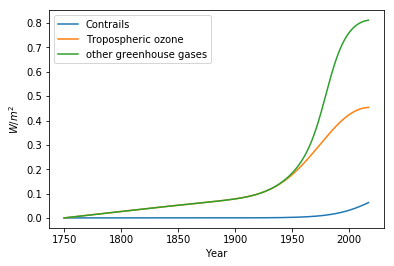

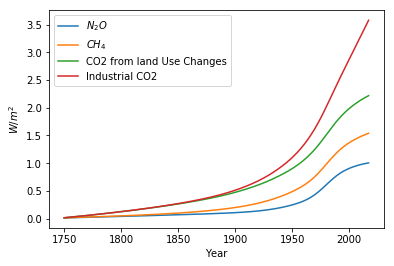

In [10]:
t = np.arange(t0,tnow+1)
plt.plot(t,rad1witho3(t),label ='Contrails')
plt.plot(t,rad1witho3(t)+rad2witho3(t), label ='Tropospheric ozone')
plt.plot(t,rad1witho3(t)+rad2witho3(t)+rad3witho3(t), label ='other greenhouse gases')
plt.xlabel('Year')
plt.ylabel('$W/m^2$')
plt.legend(loc='best')
plt.savefig('sumforcings1.eps',dpi=1000)
plt.savefig('sumforcings1.pdf',dpi=1000)
plt.figure()

plt.plot(t,rad1witho3(t)+rad2witho3(t)+rad3witho3(t)+rad4witho3(t), label ='$N_2O$')
plt.plot(t,rad1witho3(t)+rad2witho3(t)+rad3witho3(t)+rad4witho3(t)+rad5witho3(t), label ='$CH_4$')
plt.plot(t,rad1witho3(t)+rad2witho3(t)+rad3witho3(t)+rad4witho3(t)+rad5witho3(t)+rad6witho3(t), label ='CO2 from land Use Changes')
plt.plot(t,rad1witho3(t)+rad2witho3(t)+rad3witho3(t)+rad4witho3(t)+rad5witho3(t)+rad6witho3(t)+rad7witho3(t), label ='Industrial CO2')
plt.xlabel('Year')
plt.ylabel('$W/m^2$')
plt.legend(loc='best')
plt.savefig('sumforcings2.eps',dpi=1000)
plt.savefig('sumforcings2.pdf',dpi=1000)

In [11]:
def fireall(t):
    y1 = rad1witho3(t)
    y2 = rad2witho3(t)
    y3 = rad3witho3(t)
    y4 = rad4witho3(t)
    y5 = rad5witho3(t)
    y6 = rad6witho3(t)
    y7 = rad7witho3(t)
    list  = [y1,y2,y3,float(y4),y5,y6,y7]
    return list

alpha = fireall(2000)
print (alpha)

[0.03138582452727275, 0.39234034970208304, 0.3369437051644243, 0.1453357979720248, 0.46256261522663905, 0.6176271240300769, 0.8886889673897774]


0.7606698793937801
0.42372617422935577
0.03138582452727275


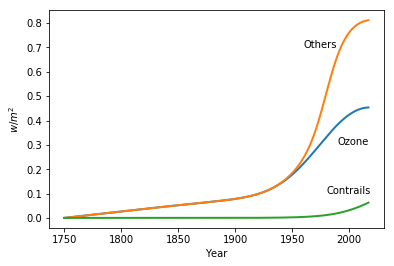

In [12]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)

t = np.arange(t0,tnow+1)
s1 = rad1witho3(t)+rad2witho3(t)
s2 = rad1witho3(t)+rad2witho3(t)+rad3witho3(t)
s3 = rad1witho3(t)
line, = ax.plot(t, s1, lw=2)
line1, = ax.plot(t, s2, lw=2)
line2, = ax.plot(t, s3, lw=2)

ax.annotate('Ozone', xy=(2000, 0.42372617422935577), xytext=(1990, 0.3))
ax.annotate('Others', xy=(2000, 0.7606698793937801), xytext=(1960, 0.7))
ax.annotate('Contrails', xy=(2000, 0.03138582452727275), xytext=(1980, 0.1))

print(rad1witho3(2000)+rad2witho3(2000)+rad3witho3(2000))
print(rad1witho3(2000)+rad2witho3(2000))
print(rad1witho3(2000))
plt.xlabel('Year')
plt.ylabel('$w/m^2$')
plt.savefig('sumforcings3.eps',dpi=1000)
plt.savefig('sumforcings3.pdf',dpi=1000)
plt.show()

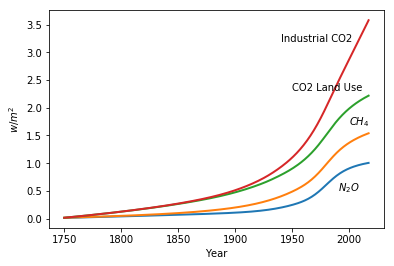

In [13]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)

s4 = rad1witho3(t)+rad2witho3(t)+rad3witho3(t)+rad4witho3(t)
s5 = rad1witho3(t)+rad2witho3(t)+rad3witho3(t)+rad4witho3(t)+rad5witho3(t)
s6 = rad1witho3(t)+rad2witho3(t)+rad3witho3(t)+rad4witho3(t)+rad5witho3(t)+rad6witho3(t)
s7 = rad1witho3(t)+rad2witho3(t)+rad3witho3(t)+rad4witho3(t)+rad5witho3(t)+rad6witho3(t)+rad7witho3(t)
line3, = ax.plot(t, s4, lw=2)
line4, = ax.plot(t, s5, lw=2)
line5, = ax.plot(t, s6, lw=2)
line6, = ax.plot(t, s7, lw=2)

ax.annotate('$N_2O$', xy=(2000, 0.917666202742049), xytext=(1990, 0.5))
ax.annotate('$CH_4$', xy=(2000, 1.38022881796869), xytext=(2000, 1.7))
ax.annotate('CO2 Land Use', xy=(2000, 1.99785594199876), xytext=(1950, 2.3))
ax.annotate('Industrial CO2', xy=(2000, 2.88654490938854), xytext=(1940, 3.2))
plt.xlabel('Year')
plt.ylabel('$w/m^2$')
plt.savefig('sumforcings4.eps',dpi=1000)
plt.savefig('sumforcings4.pdf',dpi=1000)
plt.show()
# print(rad1witho3(2000)+rad2witho3(2000)+rad3witho3(2000)+rad4witho3(2000))
# print(rad1witho3(2000)+rad2witho3(2000)+rad3witho3(2000)+rad4witho3(2000)+rad5witho3(2000))
# print(rad1witho3(2000)+rad2witho3(2000)+rad3witho3(2000)+rad4witho3(2000)+rad5witho3(2000)+rad6witho3(2000))
# print(rad1witho3(2000)+rad2witho3(2000)+rad3witho3(2000)+rad4witho3(2000)+rad5witho3(2000)+rad6witho3(2000)+rad7witho3(2000))